In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [3]:
def histosFromFiles(folder, binwidth, iftoreverse):
    
    #reading files with histos info
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    #print(files)
    
    '''
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    print(sigmaLumi)
    '''
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    for filenum, file in enumerate(files):
        print(file)
        histoarray = np.array(genfromtxt(file))
        nbins=np.int(np.amax(histoarray)/binwidth)
        n, bins, patches = plt.hist(histoarray, bins=nbins, density=True,\
                            alpha=0.7, rwidth=1, color=colormap(normalize(filenum)))
        print(histoarray.size)
        usedcolors.append(colormap(normalize(filenum)))
    #print(usedcolors)

In [4]:
# integrating the area under the histogram and plotting cross section for different parameter ranges

def intergrateHistos(folder, binwidth, iftoreverse, *cuts):
    
    
    #reading files with histos info
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    print(files)
    
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    #print(sigmaLumi)
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    
    for sigmafile in sigmaLumi:
        #print(sigmafile)
        for filenum, file in enumerate(files):
            #print(sigmafile[0])
            if (sigmafile[0] in file):
                print(sigmafile[0])
                print(file)
                #print(float(sigmafile[1]))
                histoarray = np.array(genfromtxt(file))
                nbins=np.int(np.amax(histoarray)/binwidth)
                n, bins, patches = plt.hist(histoarray, bins=nbins, density=True,\
                                    alpha=0, rwidth=1, color=colormap(normalize(filenum)))

                usedcolors.append(colormap(normalize(filenum)))
                integral=[]
                for cut in cuts:
                    integral.append(float(sigmafile[1])*binwidth * sum(n[cut:100]))
                plt.plot(cuts,integral,color=colormap(normalize(filenum)))
                plt.xlim(cuts[0],cuts[-1])


In [5]:
def histos2DFromFiles(filex, filey, binwidth):
    
    
    #normalize = mcolors.Normalize(0, len(files))

    global usedcolors
    usedcolors=[]

    histoarrayx = np.array(genfromtxt(filex))
    histoarrayy = np.array(genfromtxt(filey))
    
    nbins=np.int(np.amax(histoarrayx)/binwidth)
    print(nbins)
    
    n = plt.hist2d(histoarrayx, histoarrayy, bins=nbins, density=True, alpha=0.7, cmap=colormap)
    #print(n)
    #print(usedcolors)


histos/pT/3_pTl_500.dat
100000
histos/pT/2_pTl_300.dat
100000
histos/pT/1_pTl_100.dat
300000


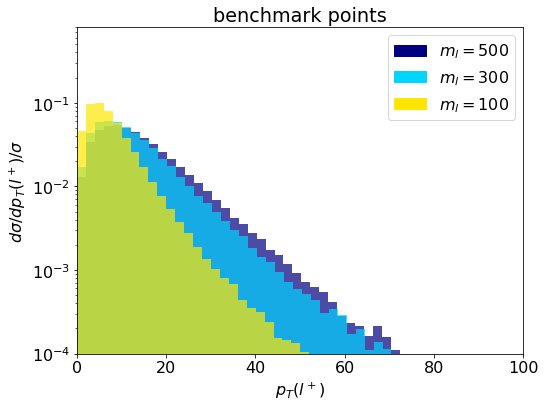

In [268]:
#pT for benchmarks

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT',2, True)


plt.xlim(0,100)
plt.ylim(10**(-4),8*10**(-1))
plt.yscale("log")

plt.title("benchmark points")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_l=500$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_l=300$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_l=100$')
plt.legend(handles=[patch1, patch2, patch3],loc='upper right')

#plt.savefig('ptl_bencmark.png')

['histos/pT_mCfixed_mlvaries/cross_sections_mCfixed.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat']
rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat


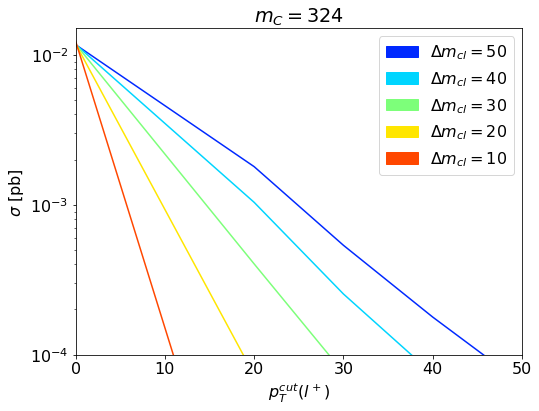

In [72]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos/pT_mCfixed_mlvaries',2,False,0,20,30,40,50)


plt.ylim(10**(-4),1.5*10**(-2))
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('cross-section_drop_with_pTcut_mTfixed.png')

histos/d0/tag_1_pythia8_events.hepmc-d0_mu.dat
679
histos/d0/tag_1_pythia8_events.hepmc-d0_e.dat
1128


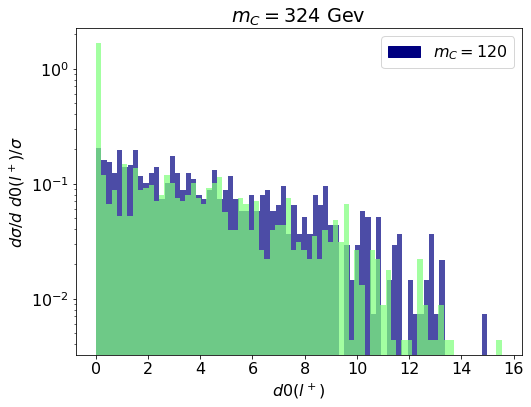

In [26]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/d0',0.2,True)


#plt.xlim(0,70)
#plt.ylim(10**(-3),0.06)
plt.yscale("log")

plt.title("$m_C=324$ Gev")
plt.xlabel('$d0(l^+)$')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')

plt.legend(handles=[patch1],loc='upper right')

plt.savefig('d0(l).png')

In [12]:
# mC fixed, ml varies

#color scheme
colormap = cm.jet

['histos/pT_mC120_mlvaries/1-pTl_rr5.00e-08_mS7.00e+01_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/2-pTl_rr5.00e-08_mS8.00e+01_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/3-pTl_rr5.00e-08_mS9.00e+01_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/4-pTl_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/6-pTl_rr5.00e-08_mS1.10e+02_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/cross_sections_mC120.dat']
rr5.00e-08_mS7.00e+01_mT1.20e+02.dat
histos/pT_mC120_mlvaries/1-pTl_rr5.00e-08_mS7.00e+01_mT1.20e+02.dat
rr5.00e-08_mS8.00e+01_mT1.20e+02.dat
histos/pT_mC120_mlvaries/2-pTl_rr5.00e-08_mS8.00e+01_mT1.20e+02.dat
rr5.00e-08_mS9.00e+01_mT1.20e+02.dat
histos/pT_mC120_mlvaries/3-pTl_rr5.00e-08_mS9.00e+01_mT1.20e+02.dat
rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
histos/pT_mC120_mlvaries/4-pTl_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
rr5.00e-08_mS1.10e+02_mT1.20e+02.dat
histos/pT_mC120_mlvaries/6-pTl_rr5.00e-08_mS1.10e+02_mT1.20e+02.dat


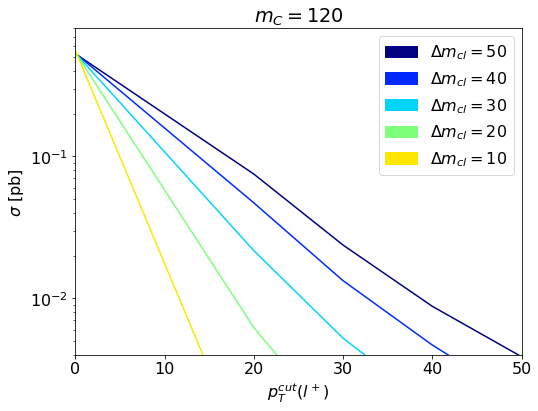

In [79]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos/pT_mC120_mlvaries',2,False,0,20,30,40,50,60,70,80,90)


plt.ylim(4*10**(-3),0.8)
plt.xlim(0,50)
plt.yscale("log")

plt.title("$m_C=120$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('cross-section_drop_with_pTcut_mT120.png')

histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


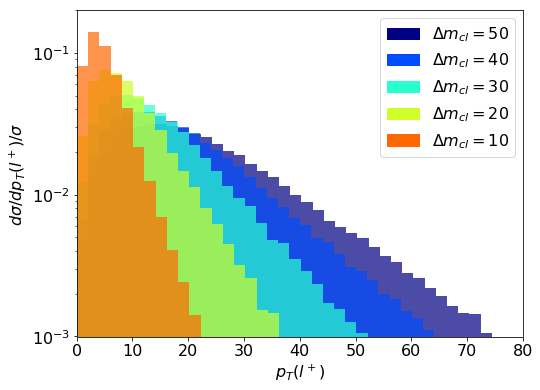

In [125]:
#pTl: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_mCfixed_mlvaries',2,False)


plt.xlim(0,80)
plt.ylim(10**(-3),2*10**(-1))
plt.yscale("log")

#plt.title("$m_C=324$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('ptl_different_splittings.png')

pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100932
pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


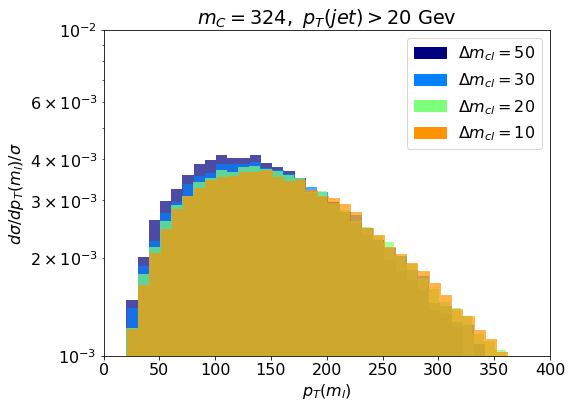

In [8]:
#pT(ml): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('pT-ml_mCfixed_mlvaries',10,False)


plt.xlim(0,400)
plt.ylim(10**(-3),10**(-2))
plt.yscale("log")

plt.title("$m_C=324,\ p_T(jet)>20$ Gev")
plt.xlabel('$p_T(m_l)$')
plt.ylabel('$d\\sigma/d p_T(m_l)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('pt_ml_different_splittings.png')

184
103
37


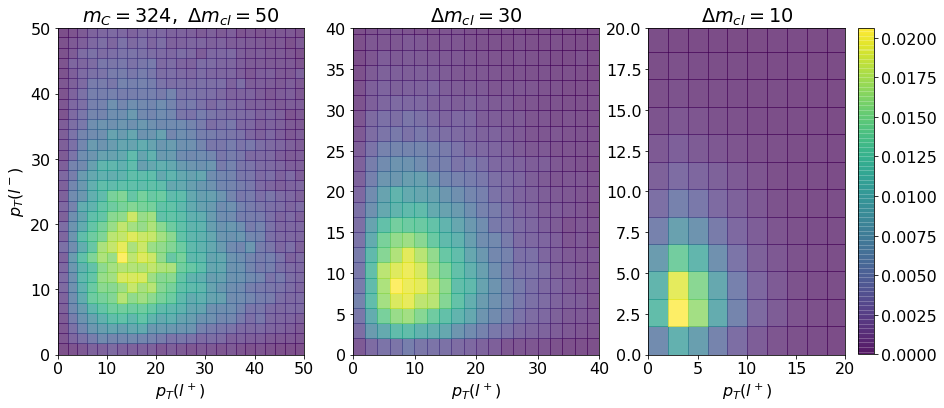

In [30]:
#Correlation of pT for mC fixed, ml varies

plt.figure(figsize=(15, 6))
plt.title('njnljn')

plt.subplot(1, 3, 1)
histos2DFromFiles('histos/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat',\
                  'histos/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat',2)
plt.xlim(0,50)
plt.ylim(0,50)

plt.title("$m_C= 324,\ \\Delta m_{cl}=50$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$p_T(l^-)$')

plt.subplot(1, 3, 2)
histos2DFromFiles('histos/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat',\
                  'histos/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat',2)
plt.xlim(0,40)
plt.ylim(0,40)

plt.title("$\\Delta m_{cl}=30$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.subplot(1, 3, 3)
histos2DFromFiles('histos/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat',\
                  'histos/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat',2)
plt.xlim(0,20)
plt.ylim(0,20)

plt.title("$\\Delta m_{cl}=10$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.colorbar()
plt.savefig('ptl-corr_different_splittings.png')

histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


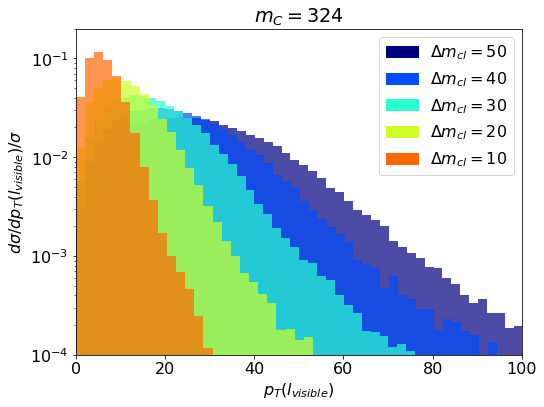

In [7]:
#pTvisible=MET: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pTvisible_mCfixed_mlvaries',2,False)


plt.xlim(0,100)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$p_T(l_{visible})$')
plt.ylabel('$d\\sigma/d p_T(l_{visible})/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('ptvisible_different_splittings.png')

histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


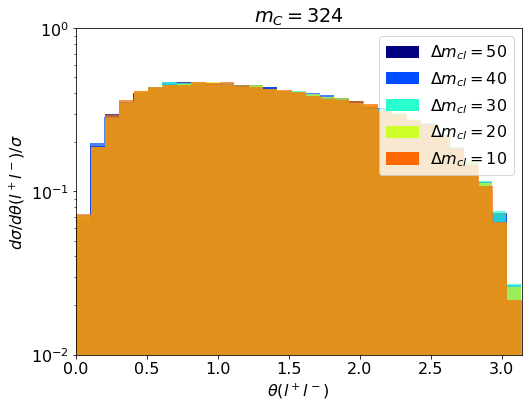

In [8]:
#angle between leptons: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/langle_mCfixed_mlvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1)
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('langle_different_splittings.png')

histos/theta-lMET_mCfixed_mlvaries/theta-lMET_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100932
histos/theta-lMET_mCfixed_mlvaries/theta-lMET_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/theta-lMET_mCfixed_mlvaries/theta-lMET_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/theta-lMET_mCfixed_mlvaries/theta-lMET_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


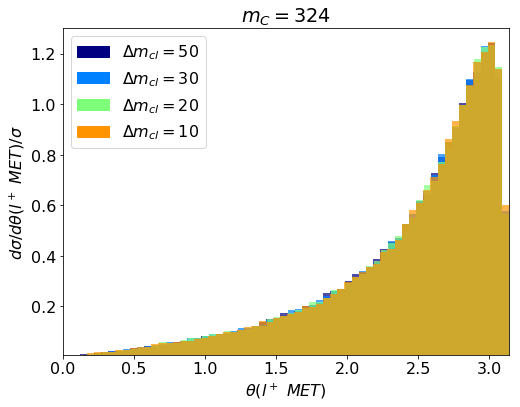

In [25]:
#angle between lepton and MET

plt.figure(figsize=(8, 6))

histosFromFiles('histos/theta-lMET_mCfixed_mlvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.3)
#plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$\\theta(l^+\ MET)$')
plt.ylabel('$d\\sigma/d \\theta(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper left')

plt.savefig('angle_lMET_different_splittings.png')

histos/m-lnu_mCfixed_mlvaries/m-lnu_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100932
histos/m-lnu_mCfixed_mlvaries/m-lnu_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/m-lnu_mCfixed_mlvaries/m-lnu_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/m-lnu_mCfixed_mlvaries/m-lnu_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


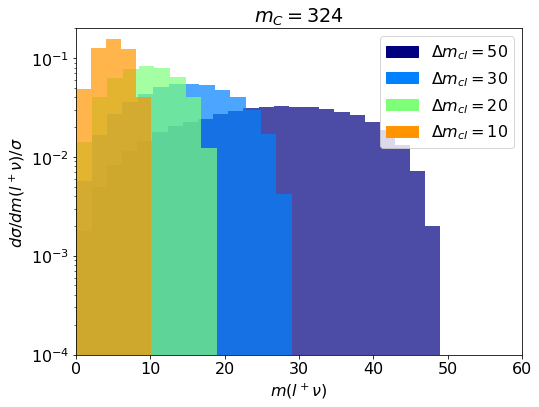

In [16]:
#m(l+ nu): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/m-lnu_mCfixed_mlvaries',2,False)


plt.xlim(0,60)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$m(l^+ \\nu)$')
plt.ylabel('$d\\sigma/d m(l^+ \\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('m(lnu)_different_splittings.png')

histos/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100932
histos/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


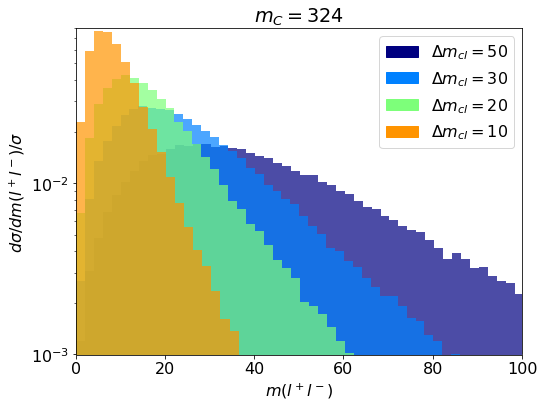

In [22]:
#m(l+ nu): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/m-ll_mCfixed_mlvaries',2,False)


plt.xlim(0,100)
plt.ylim(10**(-3),0.08)
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$m(l^+ l^-)$')
plt.ylabel('$d\\sigma/d m(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('m(ll)_different_splittings.png')

histos/dphi-lMET_mCfixed_mlvaries/dphi-lMET_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100931
histos/dphi-lMET_mCfixed_mlvaries/dphi-lMET_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/dphi-lMET_mCfixed_mlvaries/dphi-lMET_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/dphi-lMET_mCfixed_mlvaries/dphi-lMET_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


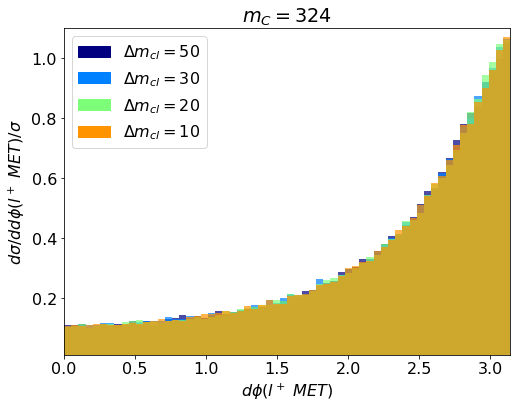

In [31]:
#azimuthal angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/dphi-lMET_mCfixed_mlvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.1)
#plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$d\\phi(l^+\ MET)$')
plt.ylabel('$d\\sigma/d d\\phi(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper left')

plt.savefig('azimuthal_angle_lMET_different_splittings.png')

In [6]:
#Delta(m_Cl) fixed, ml varies

#color scheme
colormap = cm.plasma

rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
0.5421404
rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
0.05541315
rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
0.012577656
rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
0.003995297
rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
0.001529157


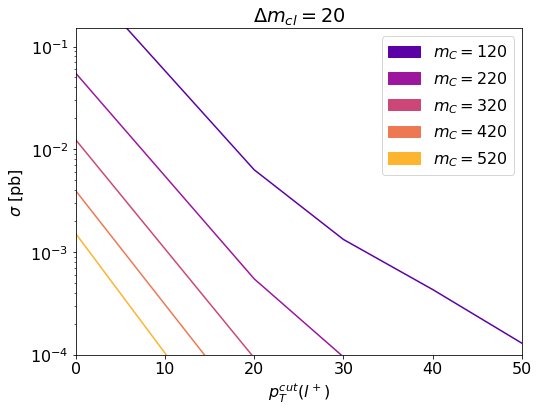

In [266]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos/pT_Delta-fixed_mCvaries',2,False,0,20,30,40,50)


plt.ylim(10**(-4),1.5*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('cross-section_drop_with_pTcut_Delta_fixed.png')

histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


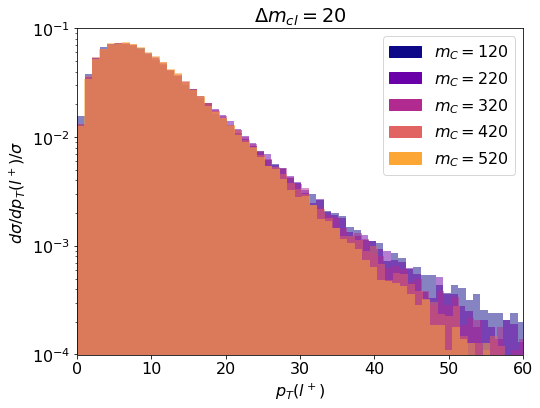

In [115]:
#pTl: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_Delta-fixed_mCvaries',1,False)


plt.xlim(0,60)
plt.ylim(10**(-4),0.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('ptl_different_mC.png')

90
66
47


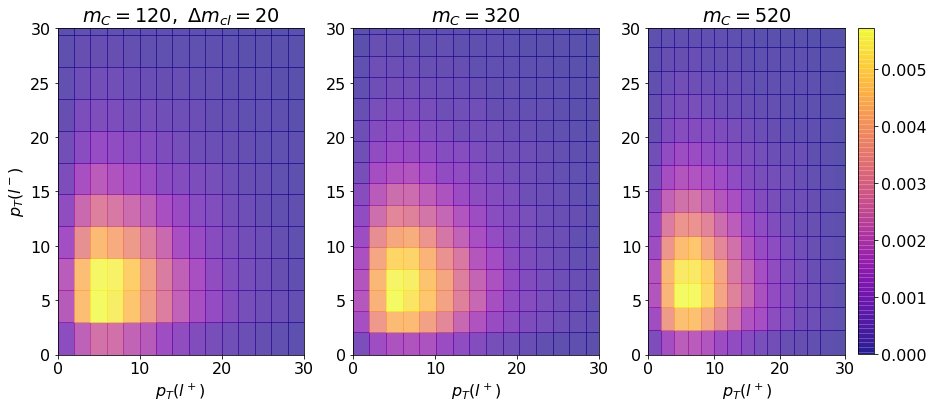

In [40]:
#Correlation of pT for mC fixed, ml varies

plt.figure(figsize=(15, 6))
plt.title('njnljn')

plt.subplot(1, 3, 1)
histos2DFromFiles('histos/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat',\
                  'histos/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=120,\ \\Delta m_{cl}=20$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$p_T(l^-)$')

plt.subplot(1, 3, 2)
histos2DFromFiles('histos/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat',\
                  'histos/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=320$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.subplot(1, 3, 3)
histos2DFromFiles('histos/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat',\
                  'histos/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=520$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.colorbar()
plt.savefig('ptl-corr_different_mT.png')

histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


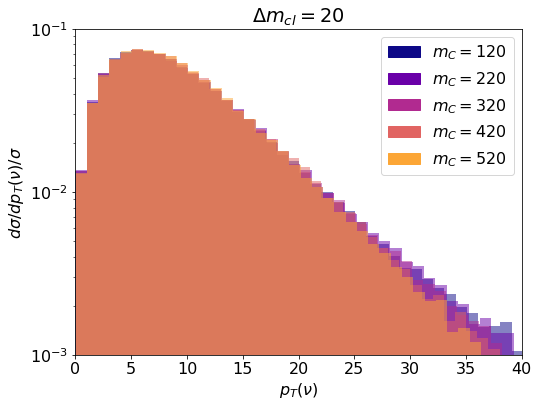

In [110]:
#pT(nu): Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pTnu_Delta-fixed_mCvaries',1,False)


plt.xlim(0,40)
plt.ylim(10**(-3),0.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(\\nu)$')
plt.ylabel('$d\\sigma/d p_T(\\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')
plt.savefig('pt(nu)_different_mC.png')

histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


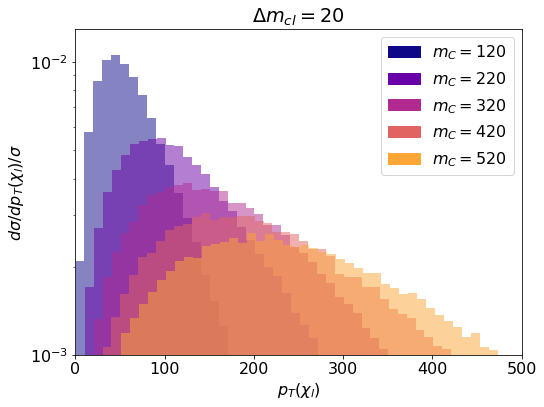

In [95]:
#pT(chi_l): Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pTchil_Delta-fixed_mCvaries',10,False)


plt.xlim(0,500)
plt.ylim(10**(-3),0.013)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(\\chi_l)$')
plt.ylabel('$d\\sigma/d p_T(\\chi_l)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('pt(chil)_different_mC.png')

histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


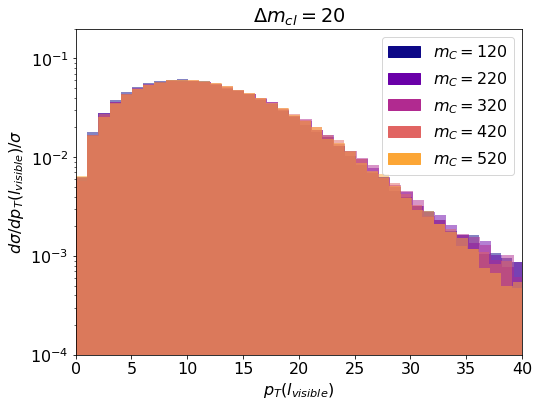

In [93]:
##### pTvisible=MET: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pTvisible_Delta-fixed_mCvaries',1,False)


plt.xlim(0,40)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(l_{visible})$')
plt.ylabel('$d\\sigma/d p_T(l_{visible})/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('ptvisible_different_mC.png')

histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


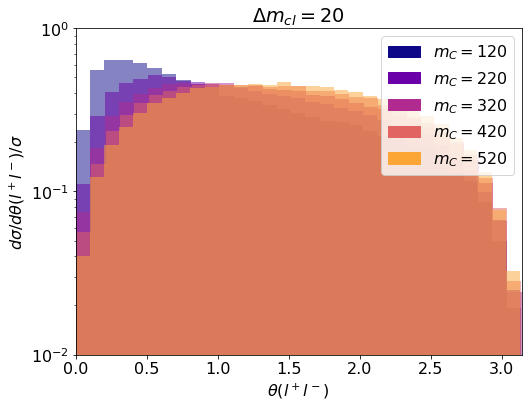

In [78]:
#angle between leptons: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/langle_Delta-fixed_mCvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('langle_different_mC.png')

histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


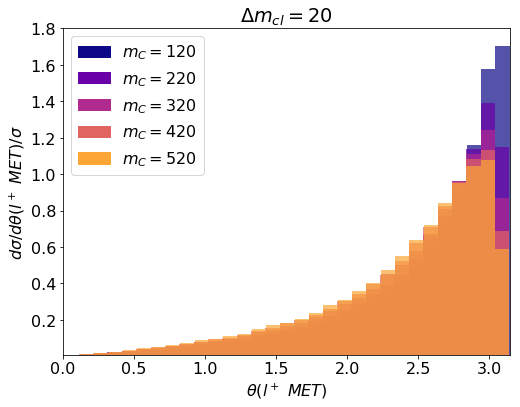

In [50]:
#angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/theta-lMET_Delta-fixed_mCvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.8)
#plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+\ MET)$')
plt.ylabel('$d\\sigma/d \\theta(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper left')

plt.savefig('angle_lMET_different_mC.png')

histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


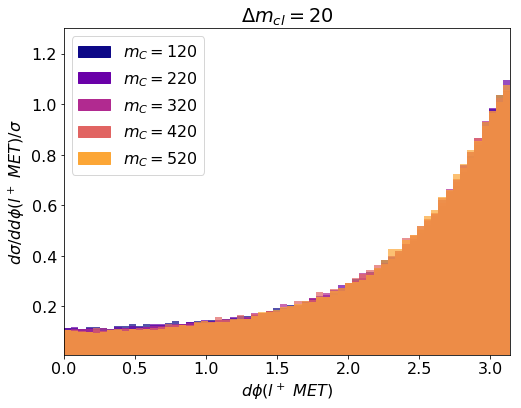

In [82]:
#azimuthal angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/dphi-lMET_Delta-fixed_mCvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.3)
#plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$d\\phi(l^+\ MET)$')
plt.ylabel('$d\\sigma/d d\\phi(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper left')

plt.savefig('azimuthal_angle_lMET_different_mC.png')

histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


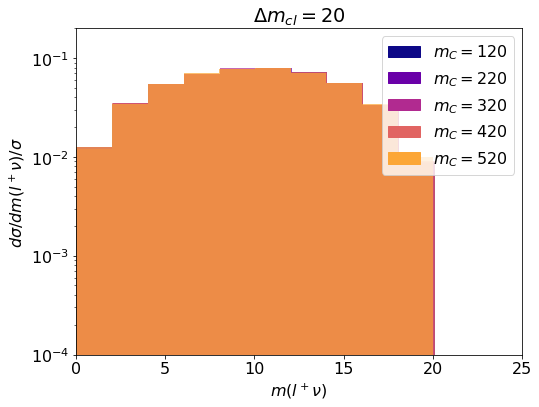

In [83]:
#m(l+ nu): Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/m-lnu_Delta-fixed_mCvaries',2,False)


plt.xlim(0,25)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$m(l^+ \\nu)$')
plt.ylabel('$d\\sigma/d m(l^+ \\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('m(lnu)_different_mC.png')

histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


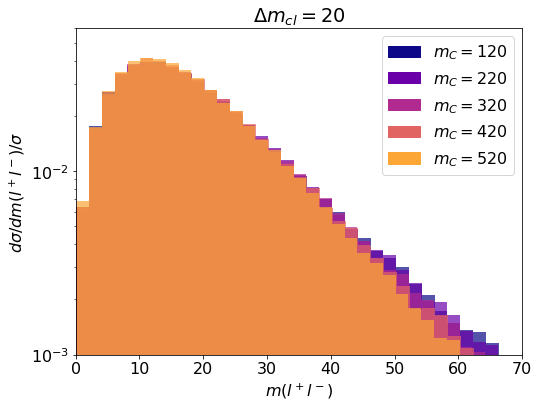

In [84]:
#m(l+ nu): Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/m-ll_Delta-fixed_mCvaries',2,False)


plt.xlim(0,70)
plt.ylim(10**(-3),0.06)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$m(l^+ l^-)$')
plt.ylabel('$d\\sigma/d m(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('m(ll)_different_mC.png')

In [140]:
#Charged states

#color scheme
colormap = cm.viridis

histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102046
histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


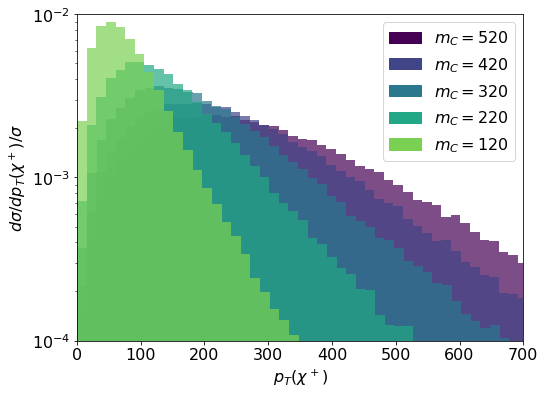

In [141]:
#pTcharged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_pT_mCvaries',15,True)


plt.xlim(0,700)
plt.ylim(10**(-4),10**(-2))
plt.yscale("log")

plt.xlabel('$p_T(\\chi^+)$')
plt.ylabel('$d\\sigma/d p_T(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('ptcharged_different_mC.png')

histos/charged_pT_520/pTminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


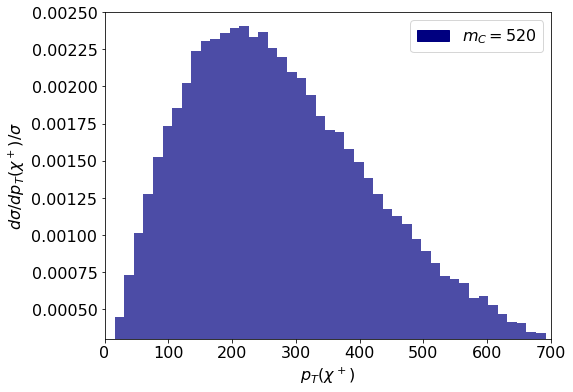

In [131]:
#pTcharged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_pT_520',15,True)


plt.xlim(0,700)
plt.ylim(3*10**(-4),2.5*10**(-3))
#plt.yscale("log")

plt.xlabel('$p_T(\\chi^+)$')
plt.ylabel('$d\\sigma/d p_T(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')


plt.legend(handles=[patch1],loc='upper right')

plt.savefig('ptcharged_mC520.png')

In [139]:
#comparing the ratio # of events for pT=200/(pT=500 or 100) with fig.5 in 1605.06509 (notice that their mass is 470):

print('our(200/500)={}'.format(0.0024/0.00075)) #Our result
print('their(200/500)={}'.format(0.17/0.05)) #Our result

print('our(200/100)={}'.format(0.0024/0.00125)) #Our result
print('their(200/100)={}'.format(0.17/0.14)) #Our result

our(200/500)=3.1999999999999997
their(200/500)=3.4
our(200/100)=1.9199999999999997
their(200/100)=1.2142857142857142


histos/charged_p_mCvaries/pminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_p_mCvaries/pminus_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_p_mCvaries/pminus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_p_mCvaries/pminus_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102045
histos/charged_p_mCvaries/pminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


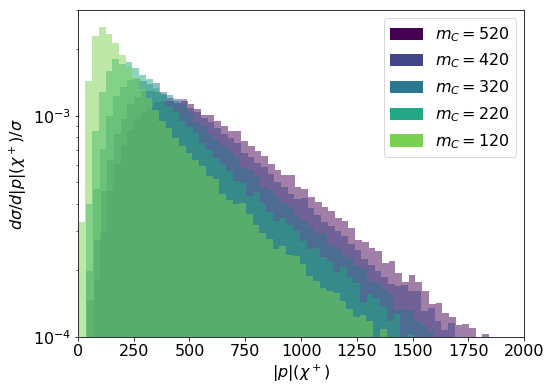

In [120]:
#|p| charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_p_mCvaries',30,True)


plt.xlim(0,2000)
plt.ylim(10**(-4),3*10**(-3))
plt.yscale("log")

plt.xlabel('$|p|(\\chi^+)$')
plt.ylabel('$d\\sigma/d |p|(\\chi^+)/\\sigma$')

patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('p_charged_different_mC.png')


histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102045
histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


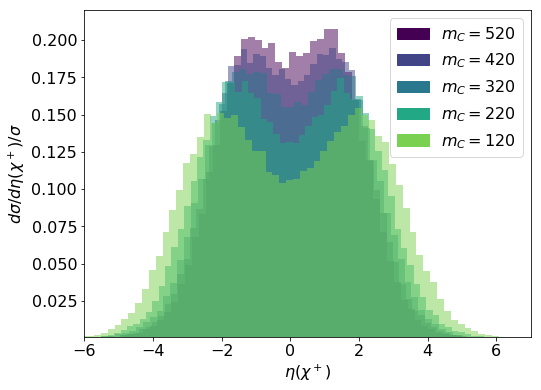

In [64]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_eta_mCvaries',0.1,True)

        
plt.xlim(-6,7)
plt.ylim(10**(-3),0.22)
#plt.yscale("log")

plt.xlabel('$\\eta(\\chi^+)$')
plt.ylabel('$d\\sigma/d \\eta(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('eta_charged_different_mC.png')

histos/charged_y_mCvaries/y_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_y_mCvaries/y_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_y_mCvaries/y_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_y_mCvaries/y_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102046
histos/charged_y_mCvaries/y_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


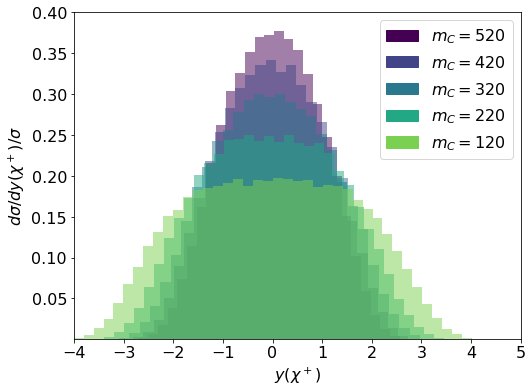

In [65]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_y_mCvaries',0.1,True)


plt.xlim(-4,5)
plt.ylim(10**(-3),0.4)
#plt.yscale("log")

plt.xlabel('$y(\\chi^+)$')
plt.ylabel('$d\\sigma/d y(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('y_charged_different_mC.png')

histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102046
histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


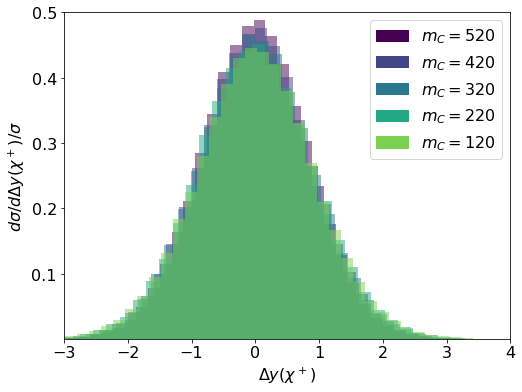

In [66]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_Dy_mCvaries',0.1,True)


plt.xlim(-3,4)
plt.ylim(10**(-3),0.5)
#plt.yscale("log")

plt.xlabel('$\\Delta y(\\chi^+)$')
plt.ylabel('$d\\sigma/d \\Delta y(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('Dy_charged_different_mC.png')

histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS2.00e+02_mT2.20e+02.dat
102045
histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


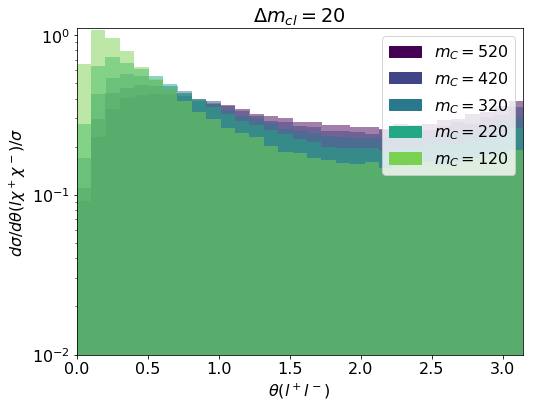

In [68]:
#angle between charged states:

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_thetaPM_mCvaries',0.1,True)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l\\chi^+ \\chi^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('theta_charged_different_mC.png')

In [9]:
(1300594-595)/12

108333.25